# 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

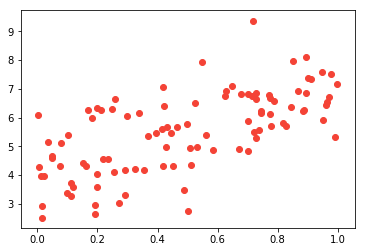

In [2]:
np.random.seed(666)
x = np.random.rand(100)
y = 3 * x + 4 + np.random.normal(0, 1, size=(100))
X = x.reshape(-1, 1)

plt.scatter(X[:, 0],  y, color="#f44336")
plt.show()

In [3]:
def J(theta, X_b, y):
    try:
        return np.var(y - X_b.dot(theta))
    except:
        return float('inf')
def dJ(theta, X_b, y):
    try: 
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / y.size
    except:
        return float('inf')

In [4]:
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

epsilon = 1e-8
eta = 0.01
theta = np.zeros((X_b.shape[1]))
theta_history = [theta.copy()]
n_iter = 0

In [5]:
last_J = J(theta, X_b, y)
while n_iter < 1e4:
    gradient = dJ(theta, X_b, y)
    theta -= eta * gradient
    theta_history.append(theta.copy())
    current_J = J(theta, X_b, y)
    
    if np.abs(current_J - last_J) < epsilon:
        break
    
    last_J = current_J
    n_iter += 1

print(theta)
print(current_J)

[ 4.02692682  3.00426351]
1.09887297738


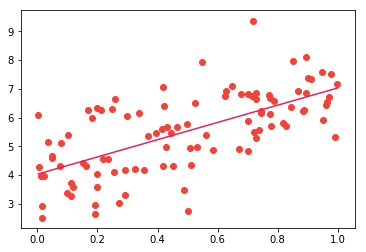

In [6]:
indexes = np.argsort(x)
plt.scatter(x[indexes], y[indexes], color="#f44336")
plt.plot(x[indexes], X_b.dot(theta)[indexes], color="#e91e63")
plt.show()

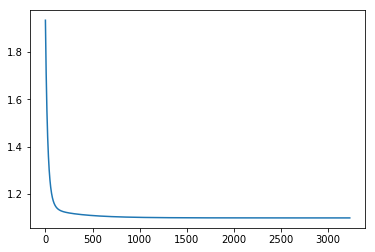

In [7]:
theta_array = np.array(theta_history)
J_history = [J(theta_item, X_b, y) for theta_item in theta_history]
J_history = np.array(J_history)
plt.plot(np.arange(0, J_history.size), J_history)
plt.show()

#### 实现我们自己的线性回归(gradient_descent)

In [8]:
from playML.LinearRegression import LinearRegression

reg = LinearRegression()
reg.fit_gd(X, y)

LinearRegression()

In [9]:
print(reg.coef_)
print(reg.intercept_)

[ 3.00758444]
4.02516406843
